<a href="https://colab.research.google.com/github/vicaaa12/machine-learning/blob/main/Personal_Loan_Campain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
#Importing packages
import pandas as pd
import numpy as np

#Library to split data
from sklearn.model_selection import train_test_split

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#To tune different models
from sklearn.model_selection import GridSearchCV

#To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/machinelearning/Loan_Modelling.csv'
loan = pd.read_csv(path)


In [ ]:
# copying data to another varaible to avoid any changes to original data
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# View the first and last 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

Dataset has 5000 rows and 14 columns

In [ ]:
#Let's check the duplicate data. And if any, we should remove it.

data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There is no duplicate

In [ ]:
#Check the data types of the columns for the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Most of data-types aer int64
- There is 5000 records and there is no null records

In [ ]:
#checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- The 'Experience' column contains negative values, and further investigation is required
- ID is unuqie for each customer and may be droped

In [ ]:
# Let's drop ID column
data.drop("ID", axis=1, inplace = True)

In [ ]:
#checking results
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data# Lets investigate further "Experience"
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

- We can see column Experince has negative values.
- Let's fix it for analysis

In [ ]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
data[data["Experience"] < 0]["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
# let's assume the negative values are typos and replace them with positive values
data['Experience'].replace(-1, 1, inplace=True)
data['Experience'].replace(-2, 2, inplace=True)
data['Experience'].replace(-3, 3, inplace=True)

In [ ]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

In [ ]:
#checking results
data[data["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

In [ ]:
data["ZIPCode"].nunique()

467

In [ ]:

data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique())

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
    data['ZIPCode'] = data["ZIPCode"].str[0:2]

In [ ]:
# Creating categorical list

cat_cols = ["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard", "ZIPCode"]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
data["Family"].dtype

dtype('int64')

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Insights from Categorical data**

In [ ]:
# Checking value counts of categorical variables
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print(data[i].value_counts(1))
    print("*" * 50)

Unique values in Education are :
Undergraduate    2096
Professional     1501
Graduate         1403
Name: Education, dtype: int64
**************************************************
Undergraduate    0.4192
Professional     0.3002
Graduate         0.2806
Name: Education, dtype: float64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
0    0.939


- The majority of customers do not have a CD account, while a smaller percentage have one.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Observations on Age

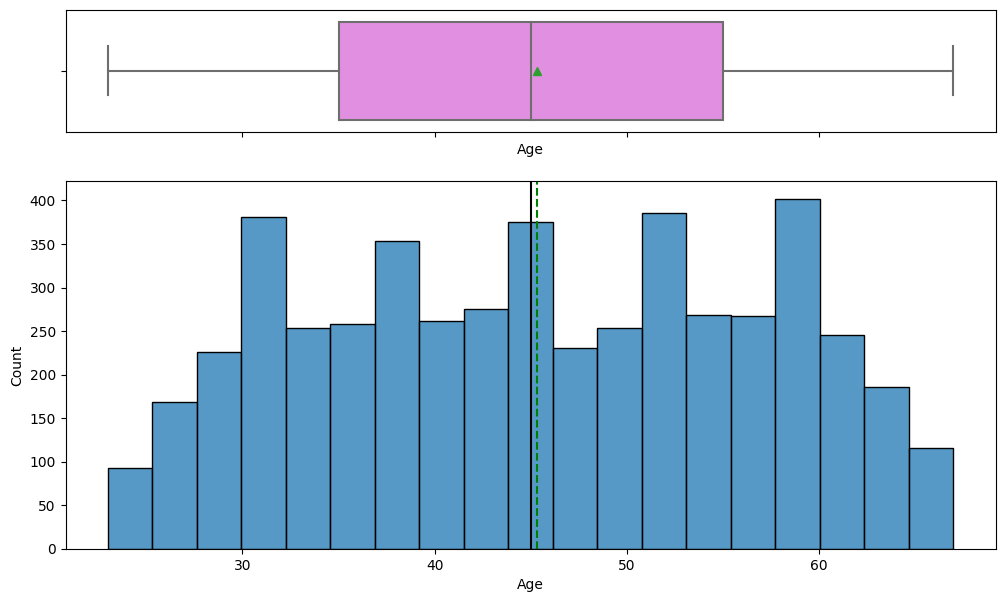

In [ ]:
histogram_boxplot(data, "Age")

- Age column is almost equally distributed
- The median age is approximately 45
- There are no outliers

Observations on Experience

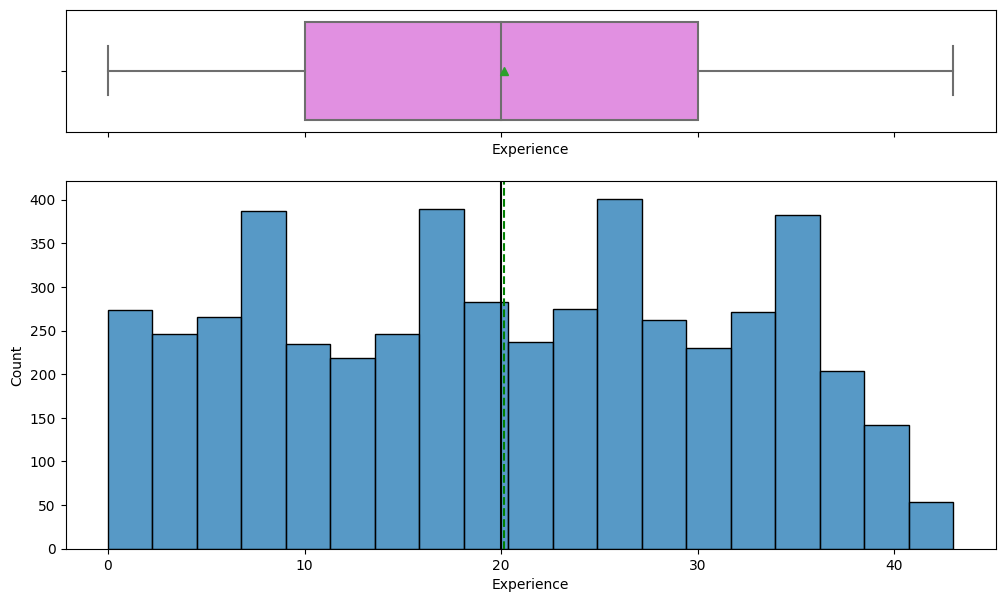

In [ ]:
histogram_boxplot(data, "Experience")

- Experience column is almost equally distributed
- The median experience is approximately 20
- There are no outliers

Observations on Income

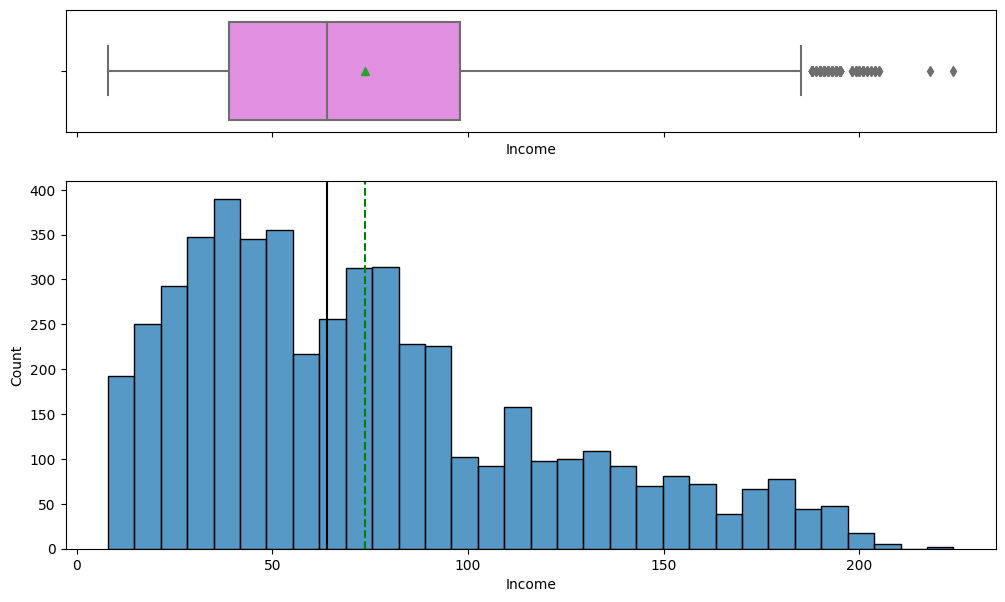

In [ ]:
histogram_boxplot(data, "Income")

- Income exhibits a right-skewed distribution
- Income ranges from 8 to 224
- The median income is 64, and the mean income is 73.
- Income has numerous outliers on the higher end.

Observations on CCAvg

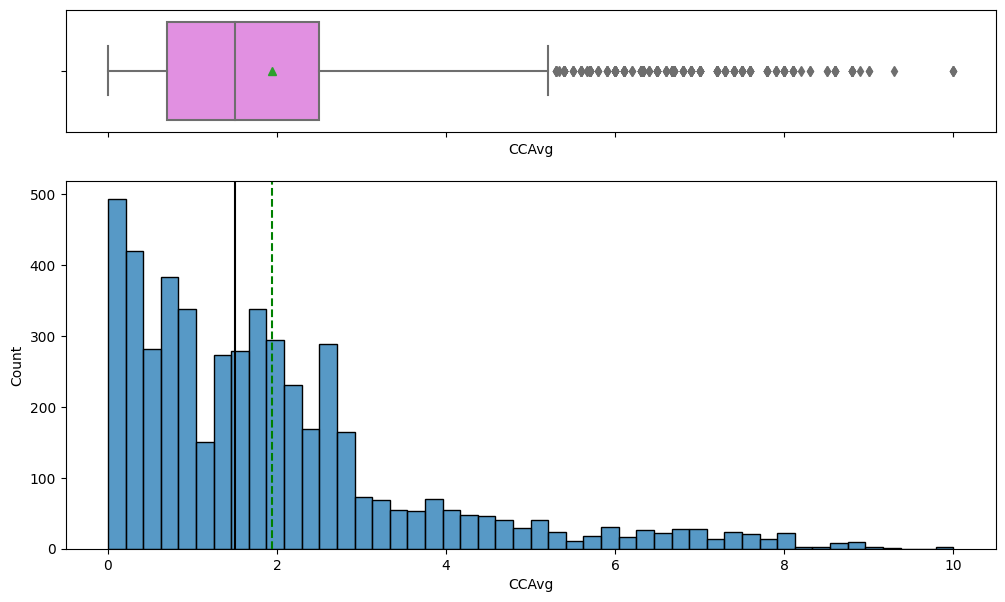

In [ ]:
histogram_boxplot(data, "CCAvg")

 - Average spending on credit cards is not equilly distributed
 - It ranges from 0 to 10
 - The avg spending is about 1.93 thousands dollars and mean is 1.5
 - It is a right-screwed distribution
 - Average spending has numerious outliers on the higher end

Observations on Mortgage

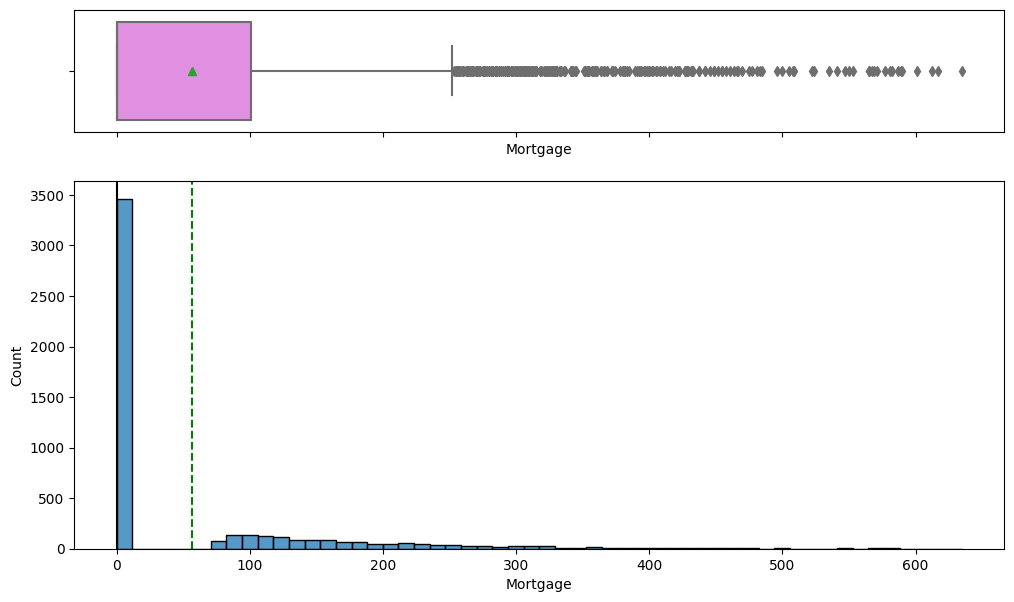

In [ ]:
histogram_boxplot(data, "Mortgage")

- The Mortgage values are not evenly distributed
- There are numerous outliers, primarily on the high end
- The 75th percentile indicates that 75% of the houses have mortgage values below $101,000
- The distribution of mortgage values is highly right-skewed, with a few houses having significantly higher mortgage amounts.
- The standard deviation of mortgage values is relatively large, indicating a wide range of variation in mortgage amounts among the houses

- The majority of houses have no mortgage, as evidenced by the median value of $0

Observations on Family

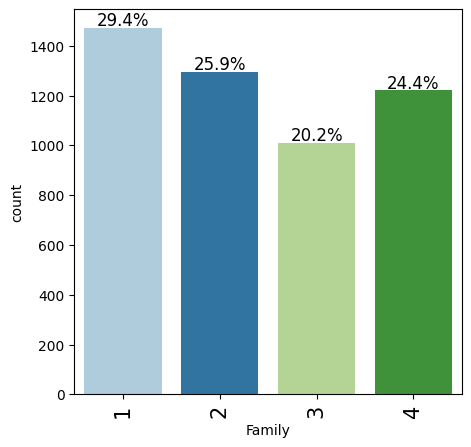

In [ ]:
labeled_barplot(data, "Family", perc=True)

- The most common family size is 1 (single individuals), followed by family sizes of 2, 4, and 3.
- The customers can be segment in 4 groups

Observations on Education

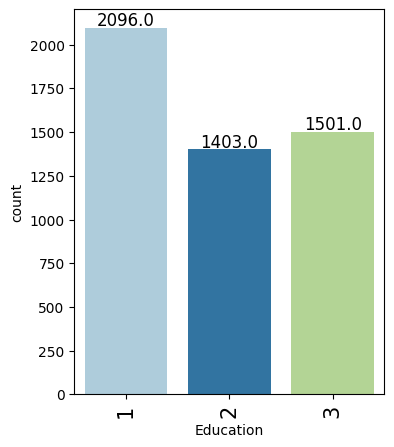

In [ ]:
labeled_barplot(data, "Education")

- Most customers have 1 education

Observations on Securities_Account

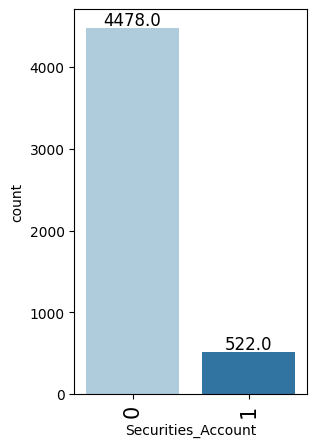

In [ ]:
labeled_barplot(data, "Securities_Account")

- Most customers don't have securities amounts

Observations on CD_Account

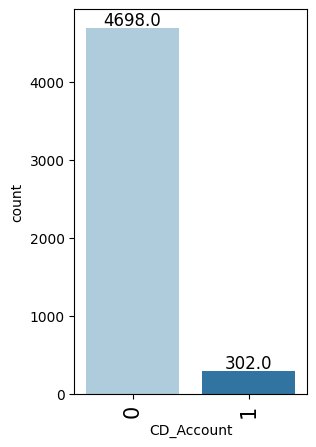

In [ ]:
labeled_barplot(data, "CD_Account")

- Most customers don't have a certificate of deposit

Observations on Online

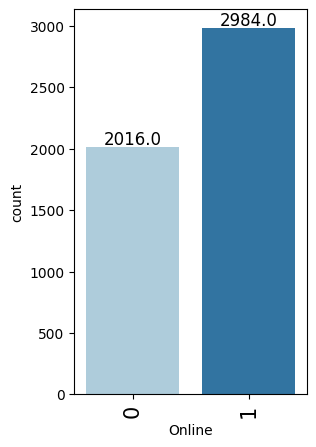

In [ ]:
labeled_barplot(data, "Online")

 - Majority of customers don't use internet banking facilities

Observations on CreditCard

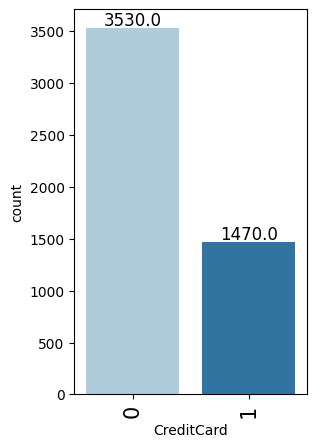

In [ ]:
labeled_barplot(data, "CreditCard")

- Most customers using a credit card issued by another bank

Observations on ZIPCode

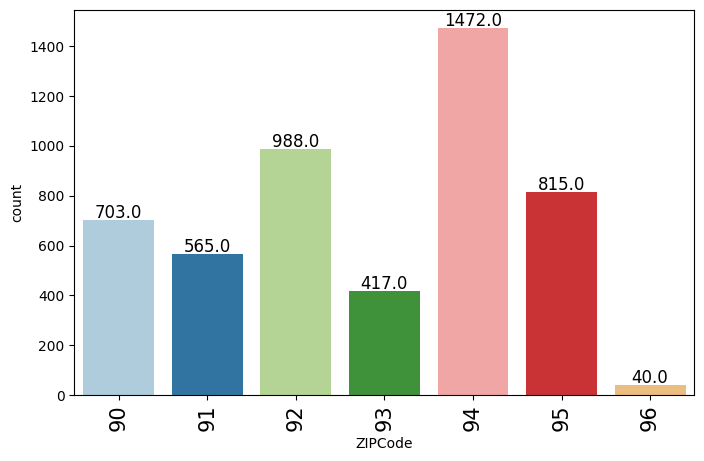

In [ ]:
labeled_barplot(data, "ZIPCode")

- The majority of customers are located in ZIP code 94, followed by ZIP code 34, and then ZIP code 9

Correlation check

<ipython-input-38-63eb9734b675>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data


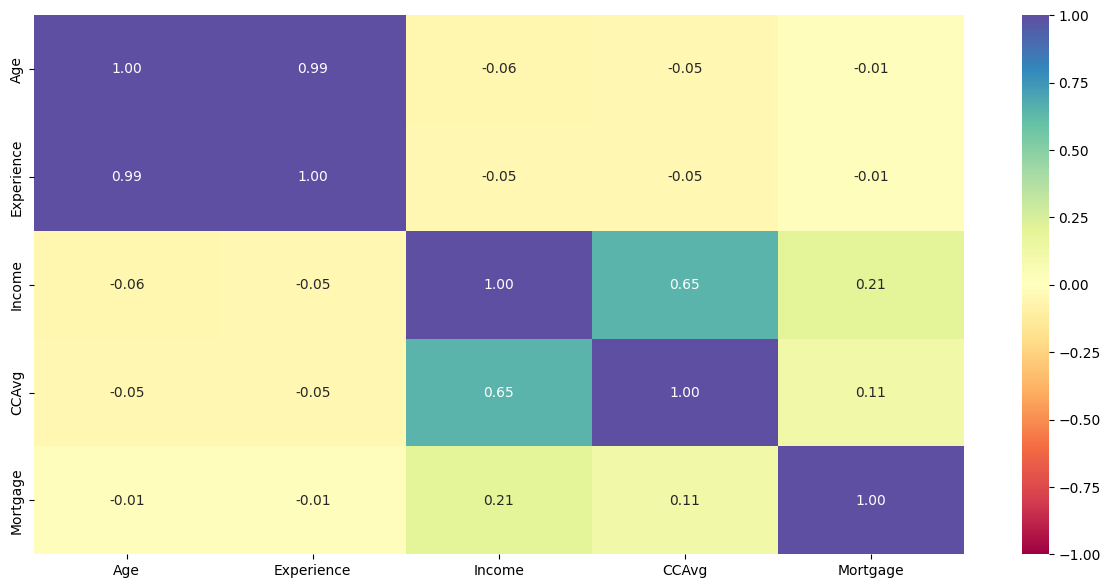

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()



-  There is a moderately strong positive correlation between income and average credit card spending per month (CCAvg). This suggests that customers with higher incomes tend to spend more on credit cards.
- There is a positive correlation  between income and mortgage values, indicating that customers with higher incomes tend to have higher mortgage values.
- Age and professional experience are highly positively correlated, which is expected since experience is often closely related to age.


Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


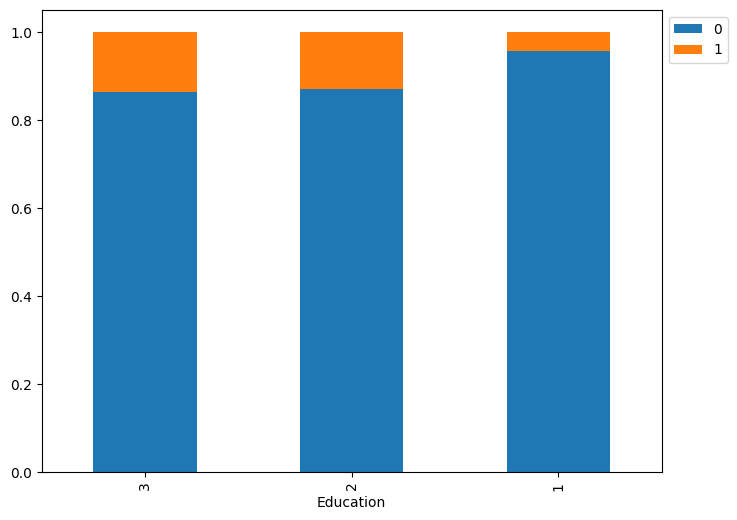

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

- For education level 1 (Undergrad), 2,003 customers did not accept a personal loan (0), and 93 customers accepted a personal loan, making a total of 2,096 customers.
- For education level 2 (Graduate), 1,221 customers did not accept a personal loan, and 182 customers accepted a personal loan (1), making a total of 1,403 customerss.
- For education level 3 (Advanced/Professional), 1,296 customers did not accept a personal loan (0), and 205 customers accepted a personal loan, making a total of 1,501 customers.
- it shows that a higher percentage of customers with education level 3 folowed by level 2 accepted personal loans compared to those with education levels 1
, customers with higher education levels are more likely to accept personal loans compared to those with lower education levels.

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


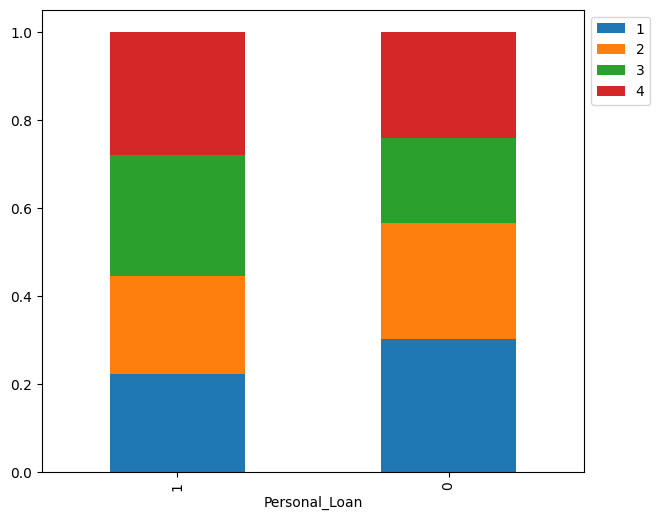

In [ ]:
stacked_barplot(data, "Personal_Loan", "Family")

- family size 1 has the highest total number of customers, and among them, a relatively small percentage accepted personal loans, while family size 3 has a higher percentage of personal loan acceptance.

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


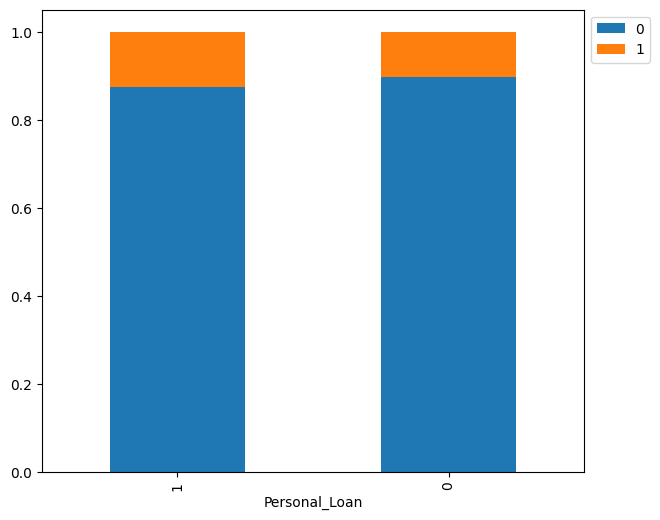

In [ ]:
stacked_barplot(data, "Personal_Loan", "Securities_Account")

- it shows that a higher percentage of customers with securities accounts accepted personal loans compared to those without securities accounts.

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


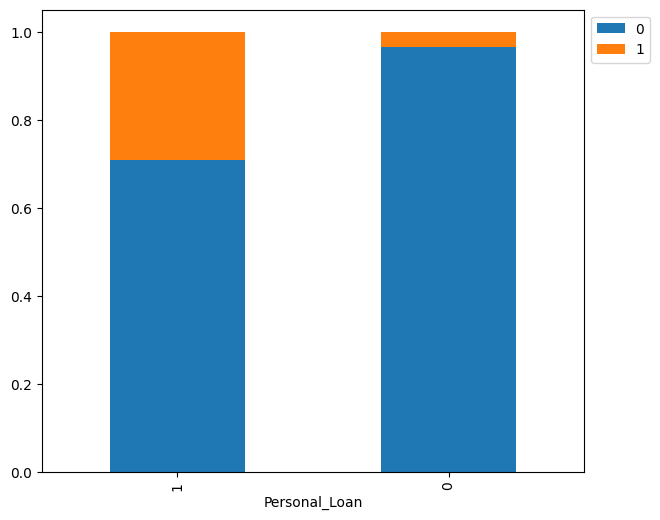

In [ ]:
stacked_barplot(data, "Personal_Loan", "CD_Account")

-  it shows that customers with a CD account are more likely to accept personal loans compared to those without a CD account.

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


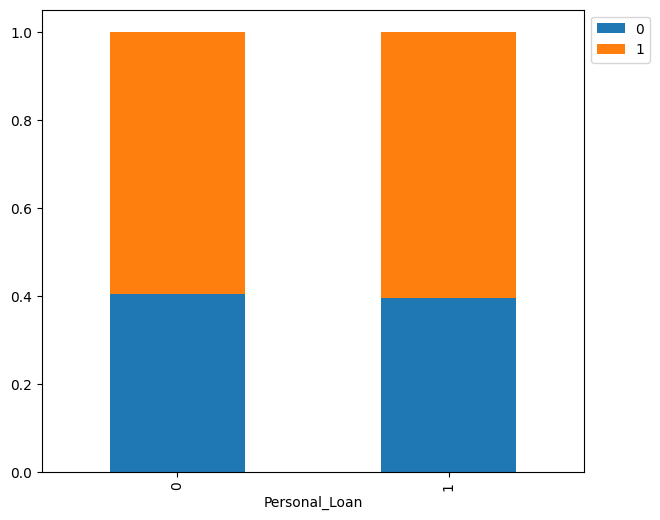

In [ ]:
stacked_barplot(data, "Personal_Loan", "Online")

- it shows that a higher percentage of customers who use online banking accepted personal loans compared to those who do not use online banking.

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


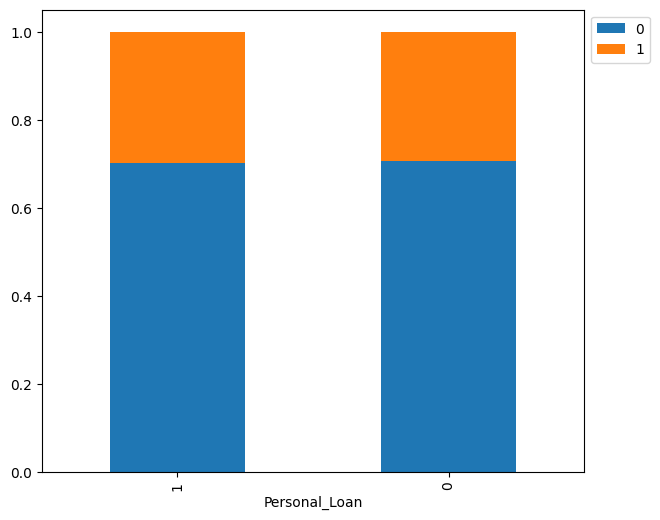

In [ ]:
stacked_barplot(data, "Personal_Loan", "CreditCard")

- These percentages represent the proportion of customers who accepted personal loans within each category of using or not using a credit card issued by any other bank. The percentages are relatively similar, indicating that there is not a substantial difference in personal loan acceptance between these two groups.


ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
------------------------------------------------------------------------------------------------------------------------


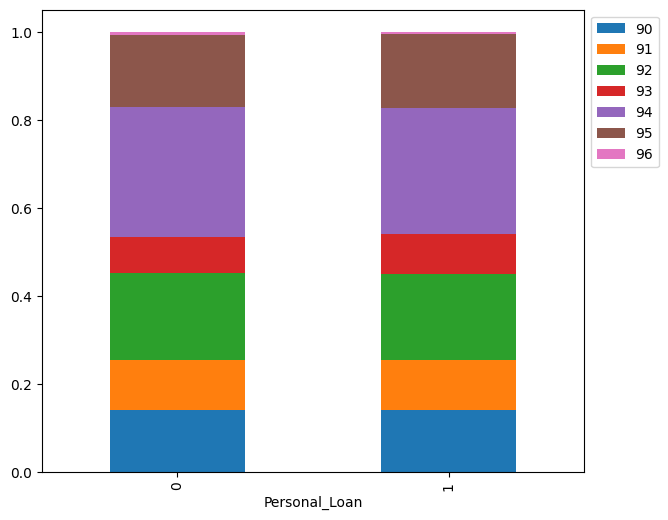

In [ ]:
stacked_barplot(data, "Personal_Loan", "ZIPCode")

- ZIP Code 93 has a relatively higher acceptance rate of approximately 10.31%.
- ZIP Code 95 also has a higher acceptance rate of about 9.82%.
- ZIP Codes 91 and 92 have slightly lower acceptance rates at around 9.73% and 9.51%, respectively.

So, ZIP Code 93 indeed has the highest acceptance rate, followed by ZIP Code 95, and ZIP Codes 91 and 92 have slightly lower acceptance rates.

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "CCAvg",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))


<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

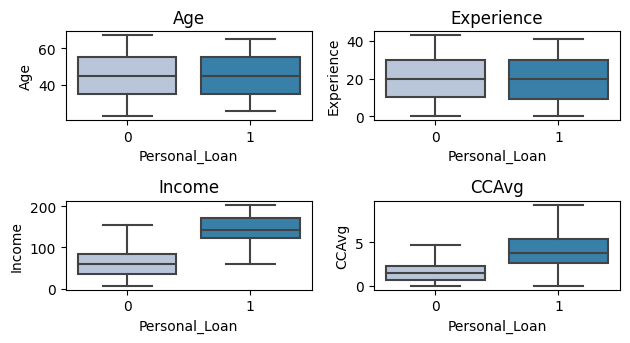

In [ ]:
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data, x=data["Personal_Loan"], y=data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

 - Customers with income higher than 100 thousand dollars are more likely to get a personal loan. This suggests that higher income is associated with an increased likelihood of personal loan acceptance.

- Customers with higher average spending on credit cards are also more likely to get a personal loan. This indicates that individuals who spend more on credit cards per month are more inclined to accept personal loan offers.

## Data Preprocessing

Let's create a list of numerical and categorical columns

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Data Description:**

- There are no duplicate values in the datasetand no missing values
- Most of the data-types are either **int64**

- Age and Experience are highly correlated.  It can lead to multicollinearity issues. Multicollinearity can make it difficult to interpret the model coefficients and can affect the model's stability. So we will drop Experience

In [ ]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [ ]:
X = pd.get_dummies(X, columns=["Education", "ZIPCode"], drop_first=True)

In [ ]:
X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Professional,Education_Undergraduate,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
0,25,49,4,1.6,0,1,0,0,0,0,1,1,0,0,0,0,0
1,45,34,3,1.5,0,1,0,0,0,0,1,0,0,0,0,0,0
2,39,11,1,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35,45,4,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print(X_train.shape, X_test.shape)

(3500, 17) (1500, 17)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:

  - Predicting that a customer will accept a personal loan(Positive), but in reality, the customer declines it, leading to a loss of resources(FP).

  - Predicting that a customer will not accept a personal loan(Negative), but in reality, the customer would have accepted it, resulting in a missed opportunity(FN).

Which case is more important?

  - Predicting that a customer will not accept a personal loan, but in reality, the customer would have accepted it, resulting in a missed opportunity (FN)

How to reduce this loss i.e need to reduce False Negatives?

  - Recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.


In [ ]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

- Building Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

- Checking model performance on training data

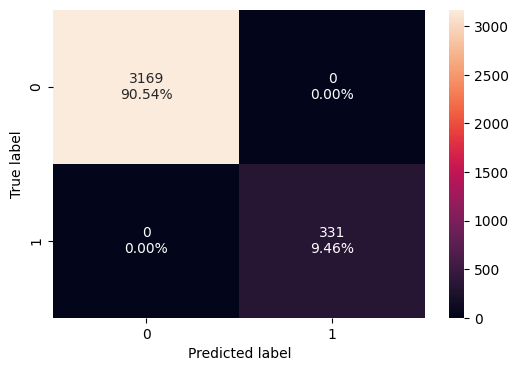

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

Checking model performance on training data

In [ ]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


- Checking model performance on test set

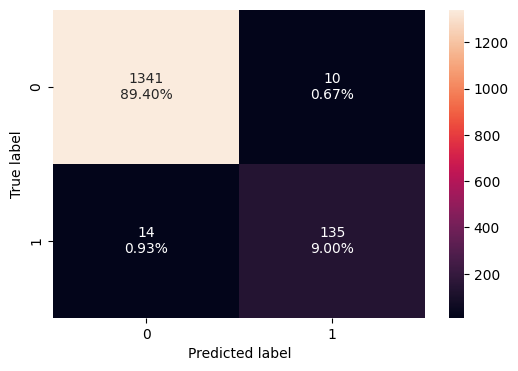

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* There is some disparity in performance of model on training set and test set wehich indicate possible overfitting

In [ ]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.9060402684563759


In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Professional', 'Education_Undergraduate', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


- Visualizing the Decision Tree

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

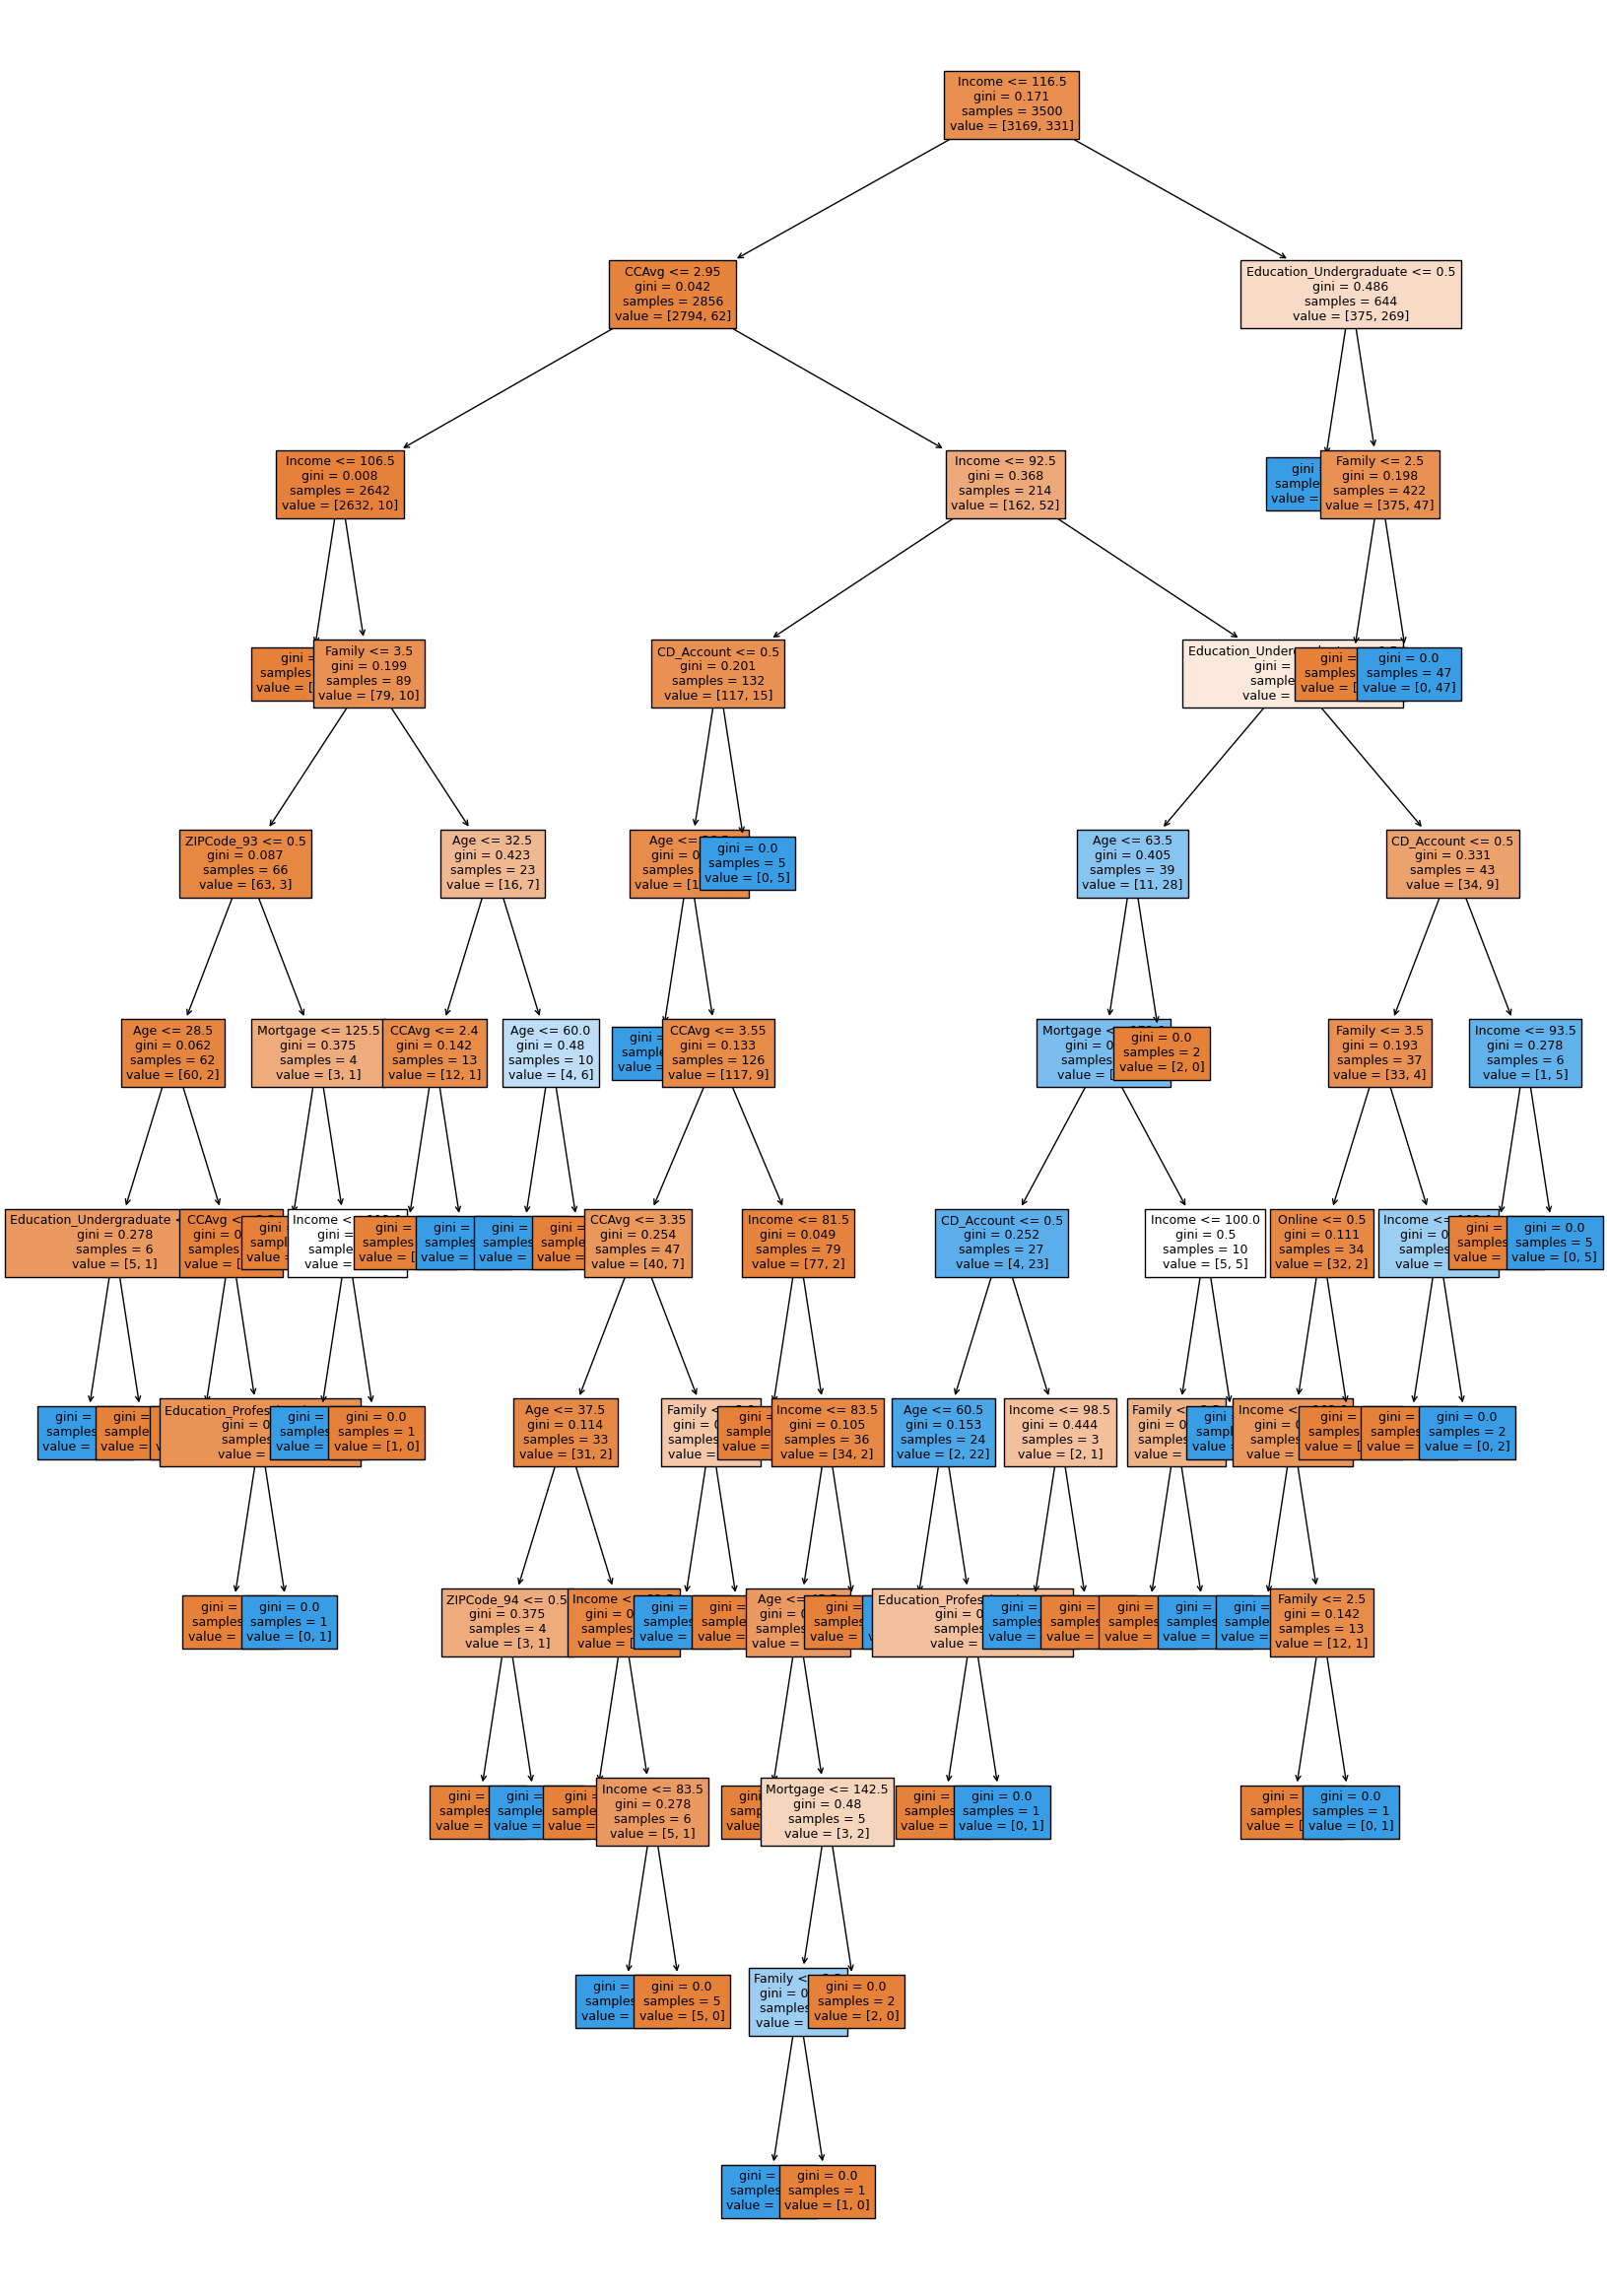

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Model Performance Improvement

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.317094
Family                   0.167368
CCAvg                    0.045621
Age                      0.026044
CD_Account               0.025711
Mortgage                 0.005628
Education_Professional   0.005144
ZIPCode_94               0.002503
ZIPCode_93               0.000594
Online                   0.000561
ZIPCode_95               0.000000
CreditCard               0.000000
ZIPCode_92               0.000000
ZIPCode_91               0.000000
Securities_Account       0.000000
ZIPCode_96               0.000000


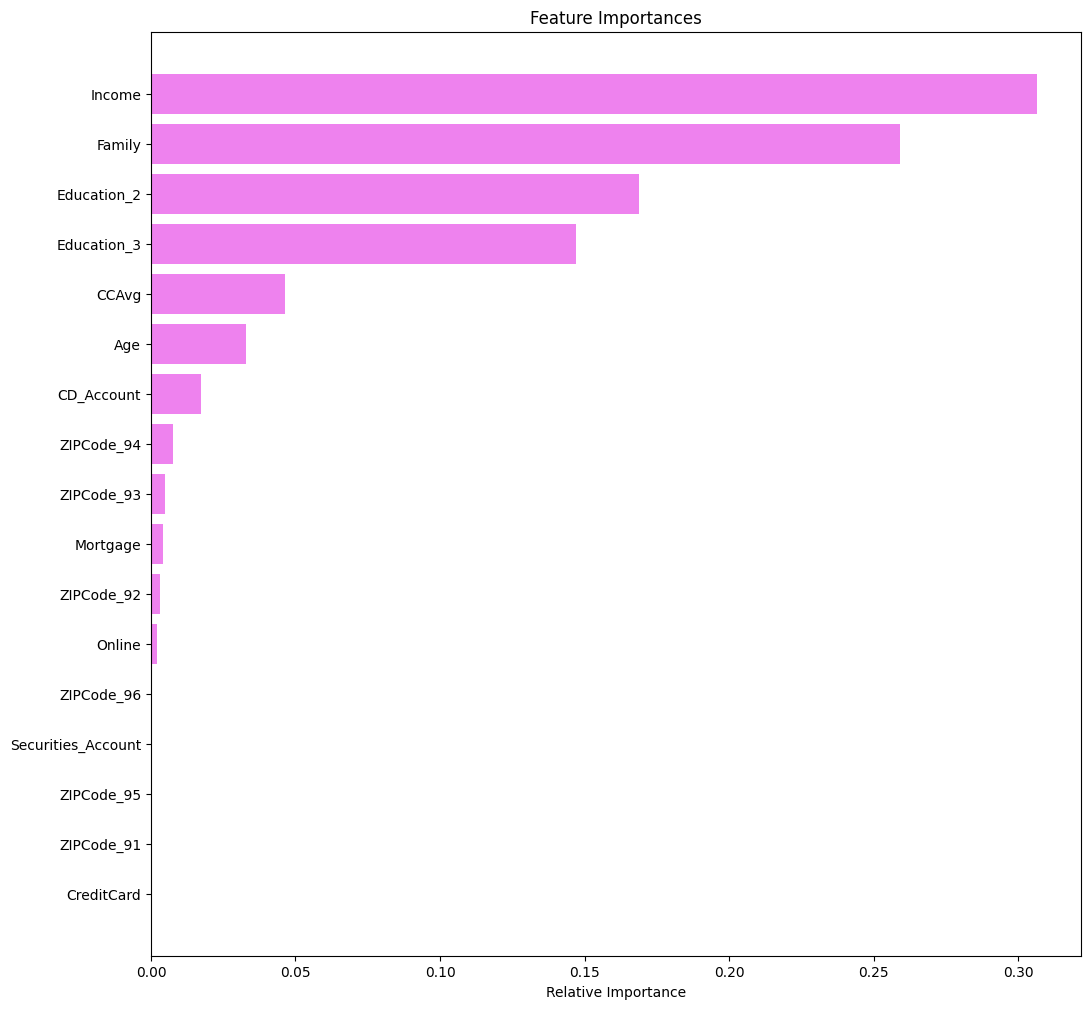

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income, Education and family size are one of the most import features

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],


}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15,
                       min_impurity_decrease=1e-05, random_state=1)

#### Checking performance on training set

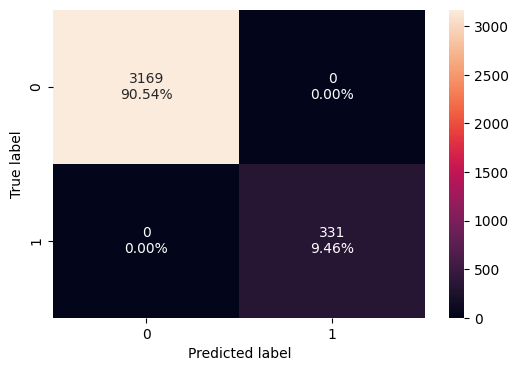

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


#### Checking performance on test set

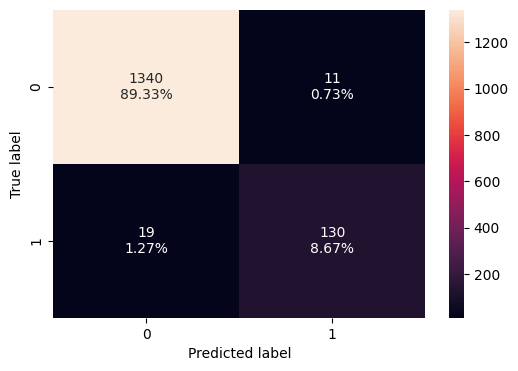

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.87248322147651


* The model is giving a generalized result now.

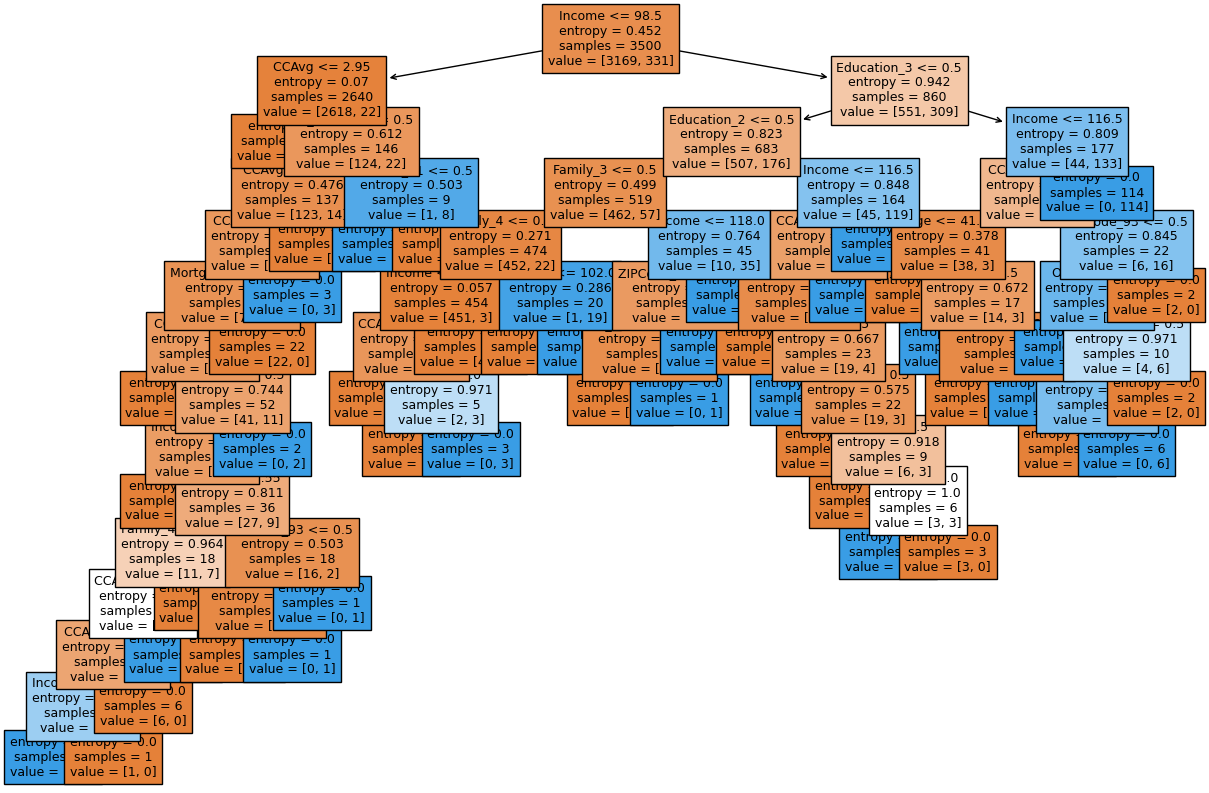

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- CCAvg <= 3.85
|   |   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |   |   |--- Income <= 74.50
|   |   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Income >  74.50
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.530133
CCAvg               0.113329
Education_2         0.103810
Education_3         0.066274
Family_4            0.066059
Family_3            0.063949
Age                 0.016446
CD_Account          0.015435
Mortgage            0.009902
ZIPCode_93          0.004892
Online              0.002992
ZIPCode_91          0.002866
CreditCard          0.002037
ZIPCode_92          0.001877
Securities_Account  0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Family_2            0.000000


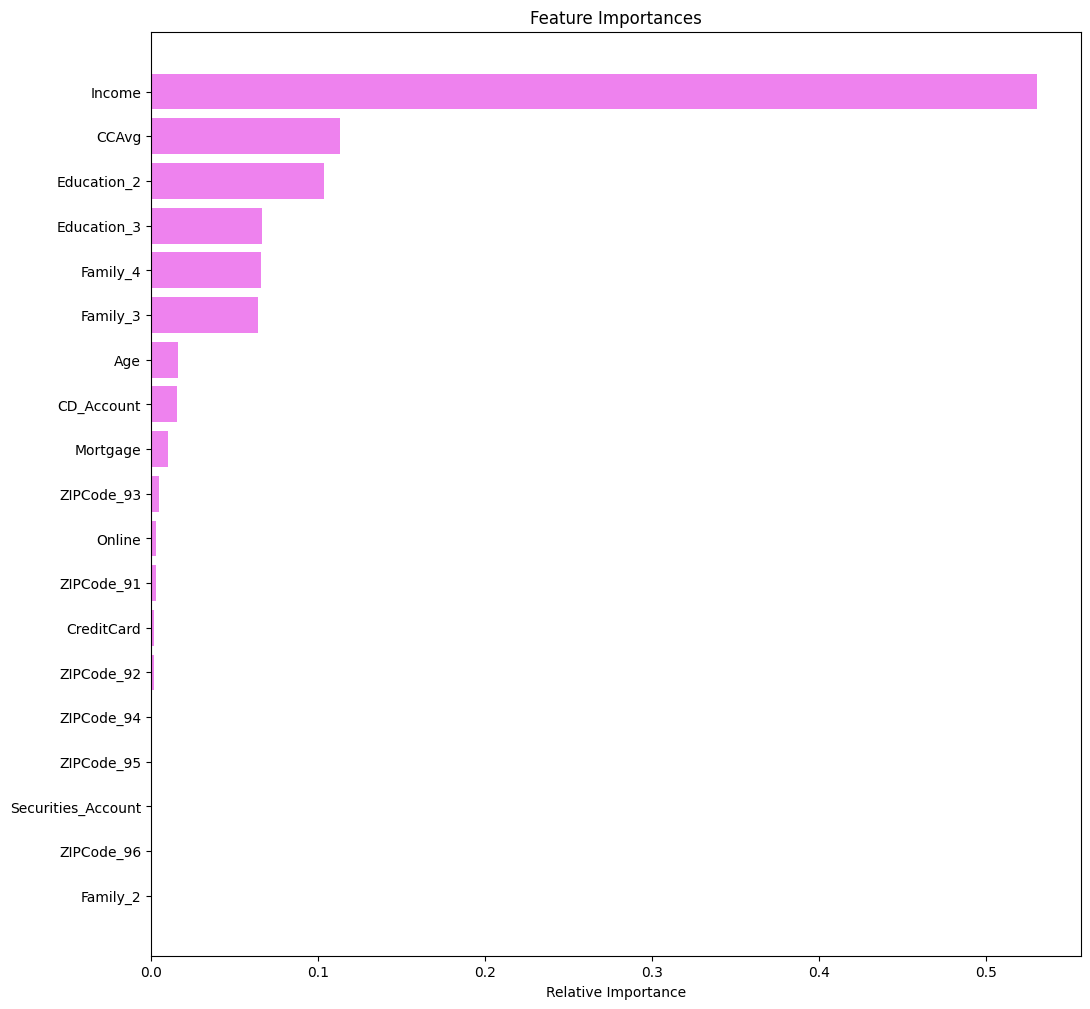

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income. credit card average, education amd family size are the most important features

Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-4.672165e-15
1,1.320471e-19,-4.672033e-15
2,1.320471e-19,-4.671901e-15
3,1.320471e-19,-4.671769e-15
4,7.482671e-19,-4.671021e-15
5,7.482671e-19,-4.670273e-15
6,1.760629e-18,-4.668512e-15
7,1.760629e-18,-4.666751e-15
8,2.332833e-18,-4.664419e-15
9,2.332833e-18,-4.662086e-15


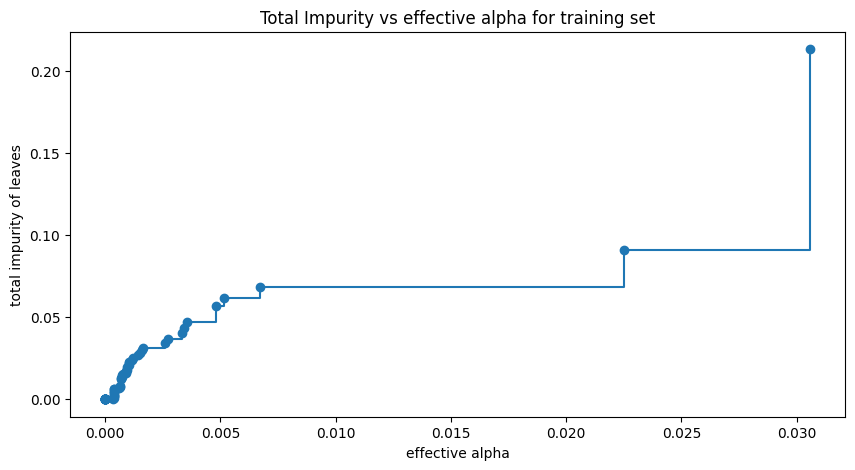

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948088


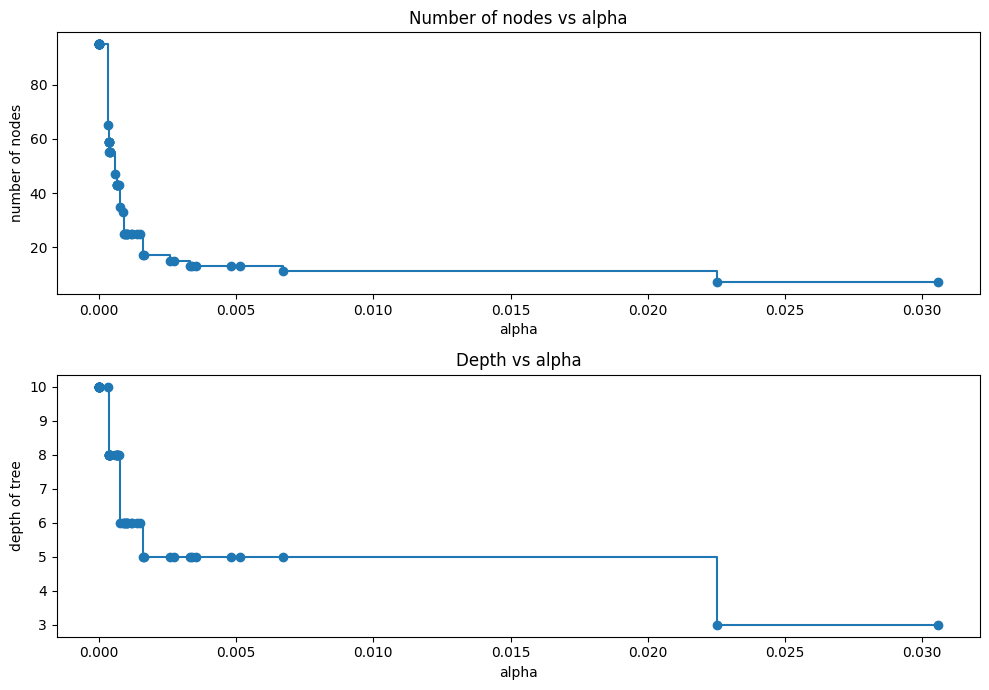

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

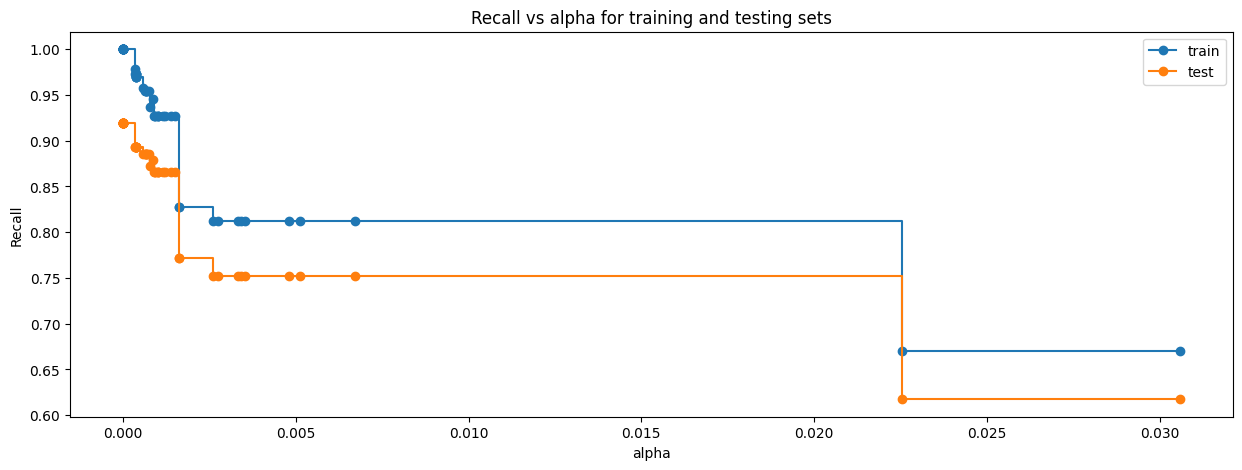

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


checking performance on training set

---



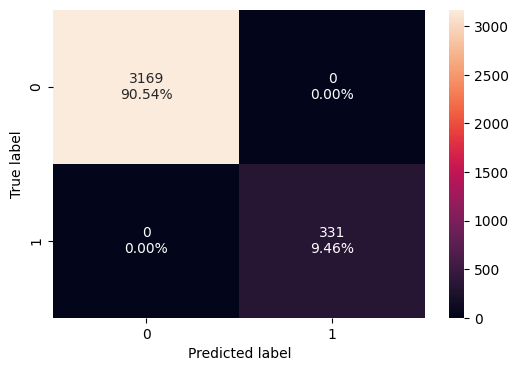

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

# checking performance on testing set




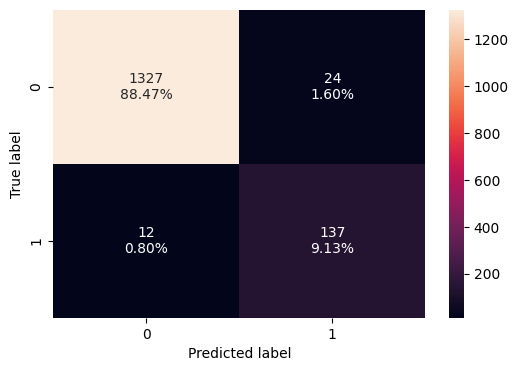

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9194630872483222


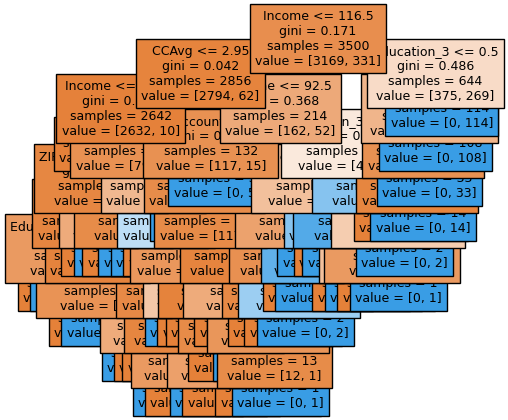

In [ ]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

In [ ]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0003, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0003, random_state=1)

#### Checking performance on the training set

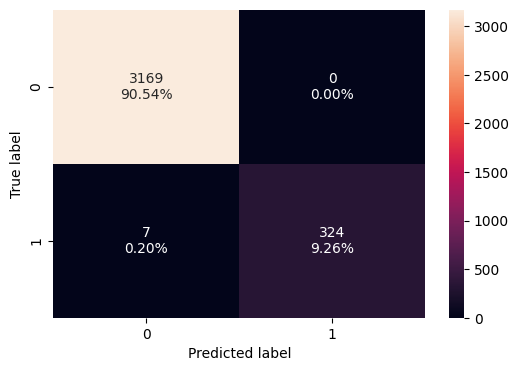

In [ ]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9788519637462235


#### Checking performance on the test set

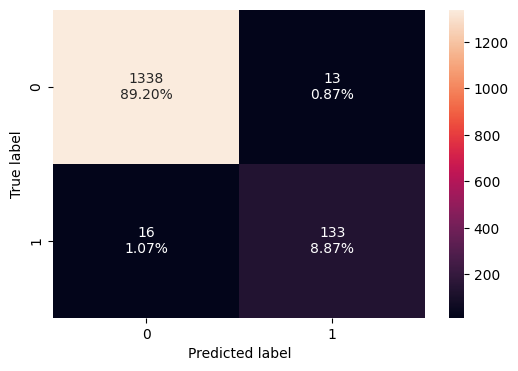

In [ ]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.8926174496644296


* The results have improved from the initial model.
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

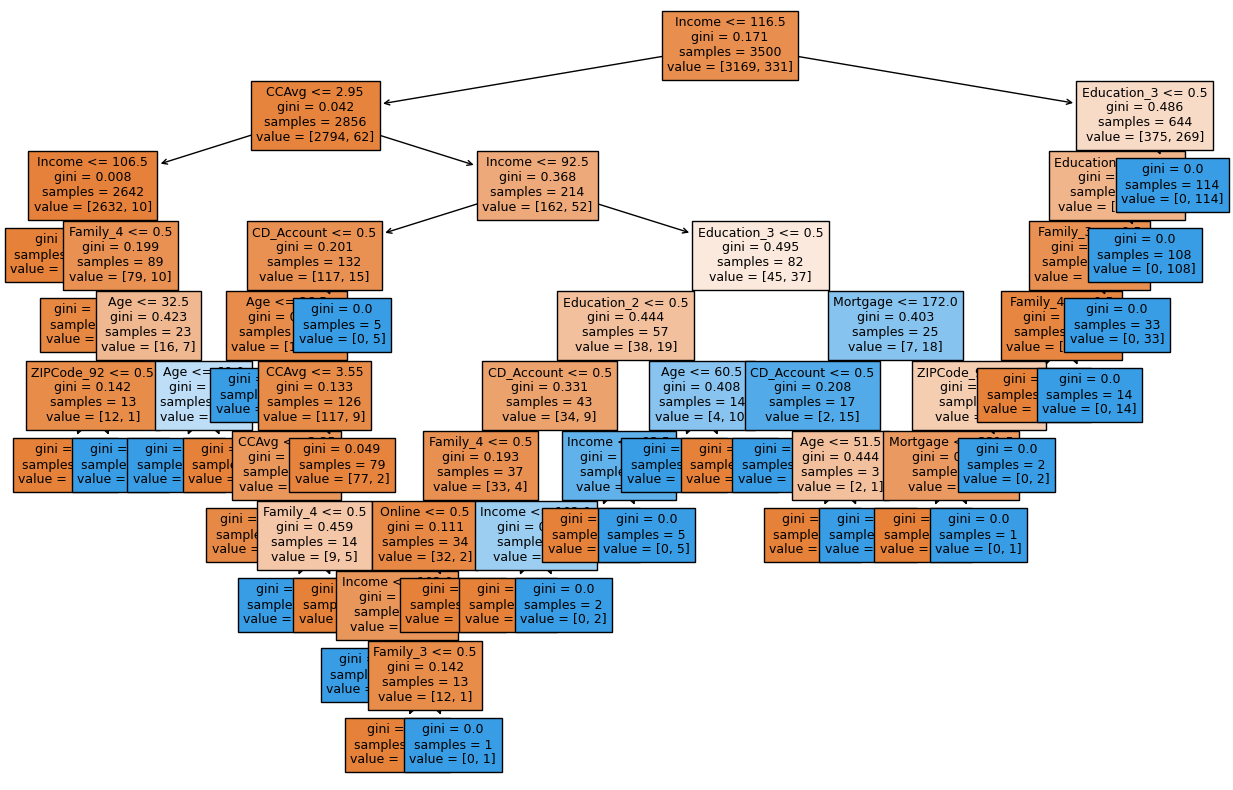

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- ZIPCode_92 <= 0.50
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- ZIPCode_92 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.312437
Education_2         0.240943
Education_3         0.169166
Family_3            0.099631
Family_4            0.064409
CCAvg               0.043146
Age                 0.028415
CD_Account          0.026949
Mortgage            0.007623
ZIPCode_94          0.003555
ZIPCode_92          0.003150
Online              0.000574
CreditCard          0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_93          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Family_2            0.000000


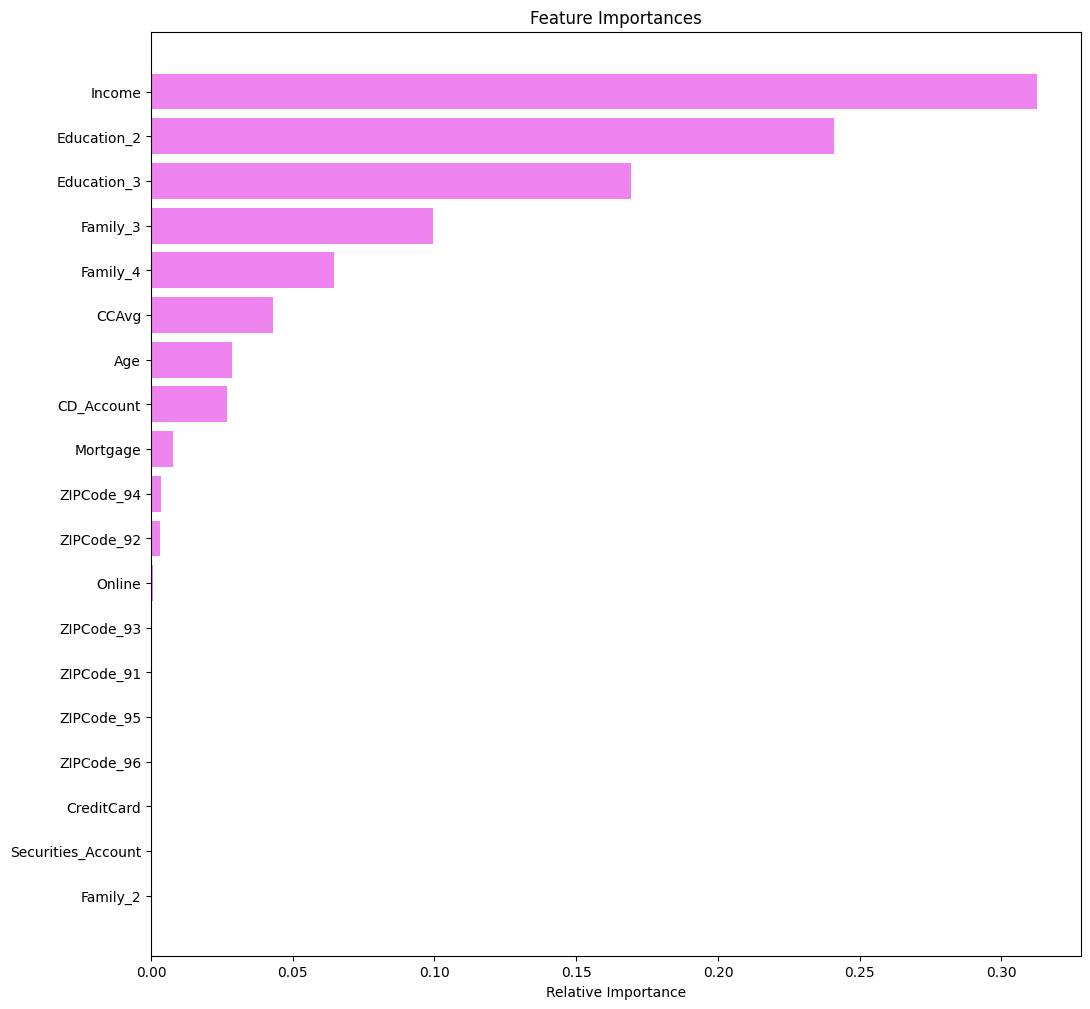

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,1.000000
2,0.978852


In [ ]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.919463
1,0.872483
2,0.892617


Decision tree model with pre-pruning has given one of the best recall score on training data.

## Actionable Insights and Business Recommendations



Conclusions

- We analyzed the data using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to accept a personal loan
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, Family size, Education, credat card average spending are the most important variable in predicting the customers that will accept the offer



* What recommedations would you suggest to the bank?

- Focus marketing efforts on customers with incomes greater than $100k, as they are more likely to accept personal loans

- Tailor marketing messages to customers with higher education levels (3 or higher), as they have a higher likelihood of accepting personal loans
- Segment customers based on their income and education levels to create targeted marketing strategies for each segment.
- Consider creating specific offers or incentives for customers with higher incomes or education levels to encourage personal loan acceptance.
- Customers who spend more on credit cards per month (CCAvg > 2.95) are more inclined to accept personal loan offers. Develop promotions or offers that are particularly attractive to this group.
- Customers with family sizes of 4 or more are more likely to accept personal loans if their income exceeds $106.50. Consider offering special packages or deals to larger families.
- Online banking customers are more likely to accept personal loans. Encourage online banking usage and offer online-exclusive promotions
- Focus marketing efforts on ZIP Codes 93 and 95, as they have higher acceptance rates. Consider localized marketing campaigns for these areas.
- Offer customized loan products or interest rates based on customers' income levels, as higher-income customers are more likely to accept personal loans.
- Customers with CD accounts are more likely to accept personal loans. Promote CD accounts and personal loans together to encourage cross-selling.
- Continuously monitor the performance of marketing campaigns and adjust strategies based on real-time data and feedback.

In [ ]:
!jupyter nbconvert  --to html "/content/drive/MyDrive/machinelearning/SL_Full_Code.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/machinelearning/SL_Full_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--J

___